# Synthetic data generation

In [1]:
import os
import warnings
import pandas as pd

warnings.filterwarnings(action='ignore', message="numpy.dtype size changed")
if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Load data

In [3]:
data = pd.read_csv('data/testing_datasets/sweden_motor_insurance/sweden_motor_insurance.csv')
data.head(10)

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108,392491
1,1,1,1,2,69.17,19,46221
2,1,1,1,3,72.88,13,15694
3,1,1,1,4,1292.39,124,422201
4,1,1,1,5,191.01,40,119373
5,1,1,1,6,477.66,57,170913
6,1,1,1,7,105.58,23,56940
7,1,1,1,8,32.55,14,77487
8,1,1,1,9,9998.46,1704,6805992
9,1,1,2,1,314.58,45,214011


## Train model and generate synthetic data

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from synthesized.core import BasicSynthesizer

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-3138-2D31-322D-B531
Expires at: 2018-12-31 00:00:00


In [14]:
with BasicSynthesizer(data=data) as synthesizer:
    synthesizer.learn(data=data, num_iterations = 20000)
    synthesized = synthesizer.synthesize(n=10000)

value types:
Kilometres categorical
Zone categorical
Bonus categorical
Make categorical-similarity
Insured continuous
Claims continuous-integer
Payment continuous-integer


## Display synthetic data

In [15]:
synthesized.head(5)

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,3,1,1,2,67.425568,14,95
1,3,6,7,6,82.650429,18,88
2,2,1,1,9,87.279289,95,86
3,2,3,6,6,89.046791,18,91
4,2,4,4,4,87.641762,12,98


In [16]:
data.head(5)

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108,392491
1,1,1,1,2,69.17,19,46221
2,1,1,1,3,72.88,13,15694
3,1,1,1,4,1292.39,124,422201
4,1,1,1,5,191.01,40,119373


# Demonstrate the utility of synthetic data 

In [17]:
from synthesized.testing import UtilityTesting, ColumnType
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [18]:
train, test = train_test_split(data, test_size=0.2, random_state=0, shuffle=True)
testing = UtilityTesting(synthesizer, train, test, synthesized)

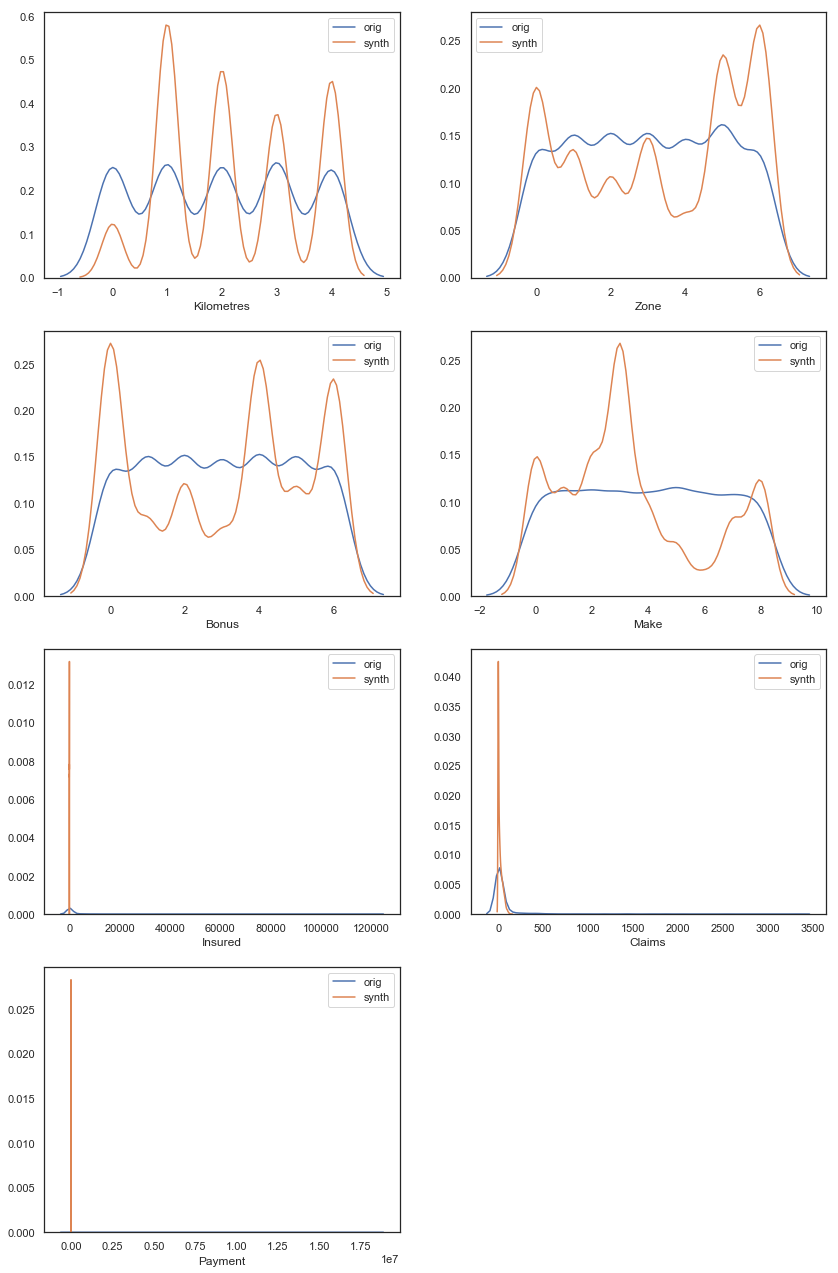

In [19]:
testing.show_distributions()

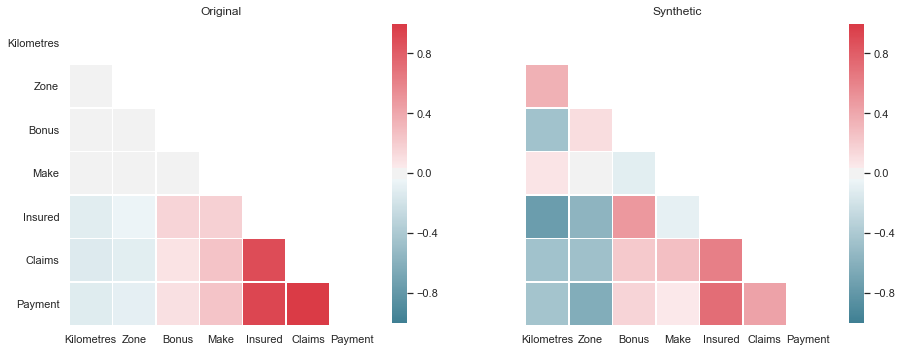

In [20]:
testing.show_corr_matrices()

# Demonstrate the utility for training ML models

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

testing.utility(target='quality', classifier=GradientBoostingClassifier(
    random_state=42,
    max_depth=6,
    max_features=2,
    min_samples_leaf=50,
    min_samples_split=800,
    subsample=0.9,
))

KeyError: "['quality'] not found in axis"

In [21]:
synthesized[synthesized["Payment"] > 10000]

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment


In [22]:
data[data["Payment"] > 10000]

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108,392491
1,1,1,1,2,69.17,19,46221
2,1,1,1,3,72.88,13,15694
3,1,1,1,4,1292.39,124,422201
4,1,1,1,5,191.01,40,119373
5,1,1,1,6,477.66,57,170913
6,1,1,1,7,105.58,23,56940
7,1,1,1,8,32.55,14,77487
8,1,1,1,9,9998.46,1704,6805992
9,1,1,2,1,314.58,45,214011
